<center><h1>BUSS6002 - Data Science in Business</h1></center>

#### Pre-Tutorial Checklist

1. Complete Task 1 and Task 2 from week 11
2. Complete up to and including Exercise 1


# Tutorial 12

# Clustering

The goal of clustering is assign data points to groups so that the similarity within each group is high and the simmilarity between groups is low. For example we might want to group customers based on their shopping habits or demographic information.

### How do we calculate similarity?

The simplest measure of similarity is the distance between two data points. The smaller the distance the more similar two points are.

Every data point we have is a vector $\mathbf x_i$. For example a house in the Baton Rouge dataset might look like

$$ x_i = [66500,	741,	1,	1,	18,	1,	1,	1,	1,	0,	6,] $$

where each value corresponds to a feature i.e. $66500, 741 Square Feet, 1 Bedroom etc. 

We can simply use the vector distance to other data points $\mathbf x_j$ to calculate the similarity. The formula to calculate the distance/similarity for points $i$ and $j$ is then

$$ d(\mathbf x_i, \mathbf x_j) = \| \mathbf x_i - \mathbf x_j \|_2 $$

### Example

Below is an example with 2 dimensional data points with three clusters

In [ ]:
# there are many ways to calculate distance
# L2 norm etc ....

[[-0.9654541   1.65828609]
 [ 0.47091176  3.48799579]
 [ 0.85810603  3.62360912]
 ...
 [ 0.91768353  3.98624423]
 [ 1.20185174  5.69293264]
 [-0.50469366  2.5004528 ]]
[2 0 0 1 2 0 1 2 0 0 1 1 0 0 2 0 1 1 2 2 1 0 0 0 1 0 2 0 2 1 2 2 1 2 1 2 0
 0 1 0 1 2 2 0 0 0 1 0 1 2]


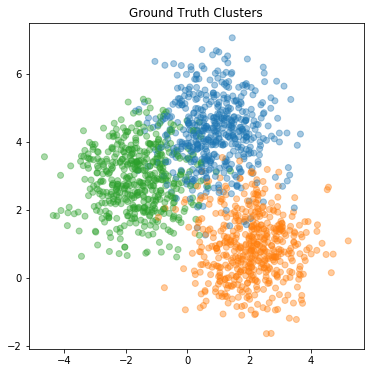

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set the RNG
np.random.seed(0)

# Create some example data
n_samples = 1500

# generate the clusters of data (n_centers)
X, y = make_blobs(n_samples = n_samples, centers = 3)

print(X)
print(y[:50])

# # Set a sqaure figure so the axes aren't distorted
plt.figure(figsize=(6, 6))

# Scatter plot the data, colour each point based on group number
plt.scatter(X[:, 0], X[:, 1], c=[cm.tab10(float(i) /10) for i in y], alpha = 0.4)

plt.title("Ground Truth Clusters")

plt.show()

#### Calculating Distances

Suppose we want to calculate the distance between points $\mathbf x_1$ and $\mathbf x_2$. If we plot these two points we know that they are from difference clusters so we expect the distance to be relatively large.

*Note: I'm setting $x_1$ to point 769 and $x_2$ to point 3*

[-1.56350131  2.83365896]
[2.393493   1.54944492]


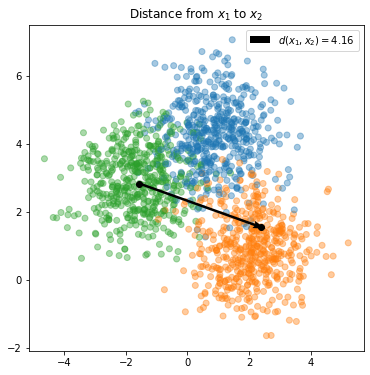

In [8]:
plt.figure(figsize=(6, 6))

# Show the points again but make them transperant
plt.scatter(X[:, 0], X[:, 1], c=[cm.tab10(float(i) /10) for i in y], alpha = 0.4)

# Highlight x_1 and x_2
idx_1 = 769
idx_2 = 3

print(X[idx_1]) #x1 769th data in dataset 
print(X[idx_2]) # x2 3rd data in dataset


plt.scatter(X[idx_1, 0], X[idx_1, 1], c="black")
plt.scatter(X[idx_2, 0], X[idx_2, 1], c="black")

# Calculating the distance - > eucliean distance
distance = np.linalg.norm( X[idx_1, :] - X[idx_2, :],  2)

# to make the direc
# Draw an arrow between the two points
direction = (X[idx_2, 0] - X[idx_1, 0], X[idx_2, 1]-X[idx_1, 1])

plt.quiver(X[idx_1, 0], X[idx_1, 1], direction[0], direction[1], angles = 'xy', units = 'xy', scale = 1,
           color = "black", label = "$d(x_1, x_2) = {0:.2f}$".format(distance))

plt.legend()

plt.title("Distance from $x_1$ to $x_2$")

plt.show()

Compare this to the distance $\mathbf x_1$ and $\mathbf x_3$ instead. Plotting these points reveals that they are in the same cluster so their distance should be relatively low.

*Note: I'm setting $x_1$ to point 769 and $x_3$ to point 0*

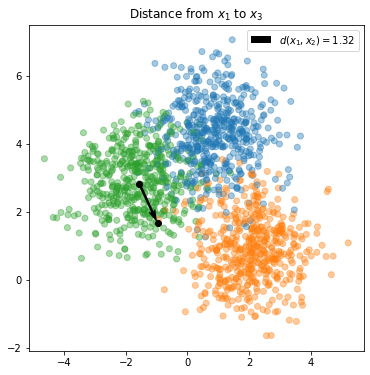

In [9]:
plt.figure(figsize=(6, 6))

# Show the points again but make them transperant
plt.scatter(X[:, 0], X[:, 1], c=[cm.tab10(float(i) /10) for i in y], alpha = 0.4)

# Highlight x_1 and x_2
idx_1 = 769
idx_2 = 0

plt.scatter(X[idx_1, 0], X[idx_1, 1], c="black")
plt.scatter(X[idx_2, 0], X[idx_2, 1], c="black")

# Calculating the distance
distance = np.linalg.norm( X[idx_1, :] - X[idx_2, :],  2)

# Draw an arrow between the two points
direction = (X[idx_2, 0] - X[idx_1, 0], X[idx_2, 1]-X[idx_1, 1])

plt.quiver(X[idx_1, 0], X[idx_1, 1], direction[0], direction[1], angles = 'xy', units = 'xy', scale = 1,
           color = "black", label = "$d(x_1, x_2) = {0:.2f}$".format(distance))

plt.legend()

plt.title("Distance from $x_1$ to $x_3$")

plt.show()

<div style="margin-bottom: 30px;"><img width=48 style="display: block; float: left;  margin-right: 20px;" src="img/question-mark-button.png"> <h3 style="padding-top: 15px;">Exercise  1 - Distances</h3></div>

Given two vectors

$$\mathbf a = [1, 2, 3]^T, \; \mathbf b = [2, 1, 5]^T$$

answer the following by hand:

1. What is the eucliean distance between the vectors $\mathbf a$ and $\mathbf b$?
2. What is the manhattan (L1) distance between vectors $\mathbf a$ and $\mathbf b$?

In [10]:
np.sqrt((2-1)**2 + (1-2)**2 + (5-3)**2)

2.449489742783178

In [11]:
abs(2-1)+abs(1-2)+abs(5-3)

4

## K-Means Clustering

K-means is a very simple clustering method. It performs suprisingly well in practice and its simplicity means that it can be applied to massive datasets with ease.

K-means follows this basic outline:
1. Set the number of clusters $k$
2. Initialise centroid of each cluster (guess or use a heuristic)
3. Assign each data point to its closest centroid (cluster assignment)
4. Set new centroids as the mean of each cluster
5. Repeat 3-4 until convergence (no change in cluster assignments)

K-Means Clustering with sklearnis straightforward

In [13]:
# https://www.youtube.com/watch?v=_aWzGGNrcic
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

# Create the kmeans object
kmeans = KMeans(n_clusters = 3)

# Calculate the cluster assignment
kmeans.fit(X)

# Get the cluster labels
clusters = kmeans.labels_
print(clusters[:100])

[2 0 0 1 2 0 1 0 0 0 1 1 2 0 2 0 1 1 2 2 1 2 0 0 1 0 2 0 2 1 2 2 1 2 1 2 0
 0 1 0 1 2 2 0 0 0 1 0 1 0 1 2 2 1 0 1 1 1 1 1 0 2 2 1 1 2 2 0 1 1 0 2 0 1
 2 2 2 1 2 1 2 1 0 1 0 0 2 0 1 0 1 2 0 0 1 2 2 1 0 0]


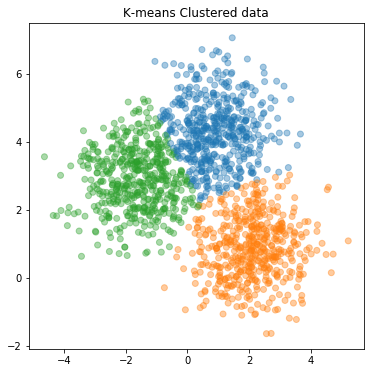

In [14]:
plt.figure(figsize=(6, 6))

# Show the points again but make them transperant
plt.scatter(X[:, 0], X[:, 1], c=[cm.tab10(float(i) /10) for i in clusters], alpha = 0.4)

plt.title("K-means Clustered data")

plt.show()

### Sensitivity to Initialisation

One problem with k-means is that the initialisation can influence the solution. If a bad guess is used for the initial centroids then the clustering might be poor. In some cases it might be worthwhile repeating k-means many times to find the mean or median cluster assignment or use a heuristic to measure cluster quality.

Fortunately in sklearn the initialisation is smarter than random initialisation so the cluster quality is usually quite good.

### Selecting k

$k$ is a hyperparameter that we must set ahead of time. Either we know how many clusters there are or we must estimate it.

The simplest method to estimate k is to use the **elbow method**! The procedure is:

1. Set a range of $k$ values
2. Perform k-means for each value of k
    1. Calculate cluster quality
3. Find the point at which cluster quality doesn't improve significantly


In the below example we see that the cluster quality flattens out after 3 clusters.

In [15]:
k_range = np.arange(1,11)

k_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters = k)
    
    kmeans.fit(X)
    
    k_scores.append(kmeans.score(X))

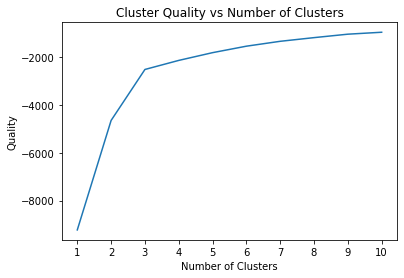

In [16]:
plt.figure()

plt.plot(k_scores)

plt.xticks(np.arange(0, 10), k_range)

plt.title("Cluster Quality vs Number of Clusters")

plt.xlabel("Number of Clusters")
plt.ylabel("Quality")

plt.show()

<div style="margin-bottom: 30px;"><img width=48 style="display: block; float: left;  margin-right: 20px;" src="img/question-mark-button.png"> <h3 style="padding-top: 15px;">Exercise 2 - K-Means Update Process</h3></div>

Given the following cluster assignment

| x | y | cluster |
|---|---|---------|
| 2 | 2 | 0       |
| 3 | 2 | 0       |
| 1 | 2 | 0       |
| 4 | 6 | 1       |
| 1 | 1 | 1       |

Perform the following k-means update steps

1. Calculate the new cluster means
2. Re-assign each data point to the new cluster mean

# Dimensionality Reduction


## What is Dimensionality Reduction?

- Dimension Reduction reduces the number of input variables/features
- If we have $p$ input features we can reduce it down to a smaller number $k$ where $k << p$
- For example we might have 100 ($p$) features about a customer which we might reduce to 10 ($k$) features 

## Why?

1. Reduces computational requirements
    - Often when working with massive datasets it takes a long time to train our model or lots of memory. By reducing the number of features we can reduce the amount of time it takes to train the model and the memorry required to store the data.
2. Removes redundant information
    - Sometimes in our data there is redundancy, which is sometimes called multicolinearity. This means that some features tell us the exact same thing. We should remove these redundant features because they do not contribute to our model and only serve to increase computational requirements.
    - In some cases like linear regression, removing multilinear features can improve the performance of the model


## Principal Component Analysis

There are many algorithms for dimension reduction. One popular choice is Principal Component Analysis (PCA).

PCA works by creating new features which are combinations of the original features. The new features (called components) are ranked in order of the variance which they explain from most variance to least. In other words the first principal component is the first new feature. The first feature then contains the most information possible about the data.

An additional constraint is imposed: each principal component must be orthogonal to the others. Another way to think of PCA is that it transforms the original feature space to a new smaller feature space, which different axes.

### Visualisation of PCA process

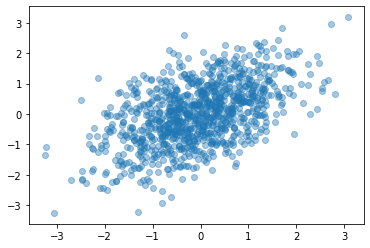

In [2]:
%matplotlib inline
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt

# Generate some data with two features (2D)

means = [0, 0]
cov = np.matrix([ [1, 0.5], [0.5, 1] ])

X = multivariate_normal.rvs(mean = means, cov = cov, size = 1000)

plt.scatter(X[:,0], X[:,1], alpha = 0.4)

plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - PCA</h3></div>
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

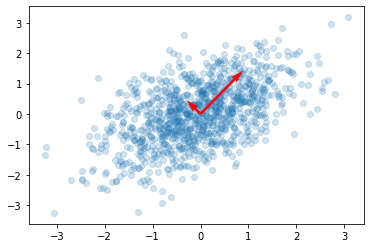

In [3]:
# Learn the first two Principal Components of the data
# Plot the components
# PCA is a projection of the data to these two new axes

from sklearn.decomposition import PCA

pca = PCA()

# fit -> learn the component vectors
pca.fit(X)

Xpca = pca.transform(X)
# Xpca is the data after PCA processed 

W = pca.components_

plt.scatter(X[:,0], X[:,1], alpha = 0.2)

plt.quiver(np.zeros(2), np.zeros(2), W[:,0], W[:,1], scale_units='xy', scale=1/pca.explained_variance_, color = "red")

plt.show()

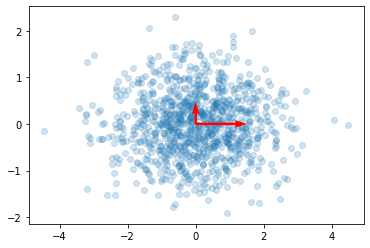

In [4]:
# Rotate the coordinates to align with cartesian coordinates
# Notice that the first component is along the horizontal axis
# It's length is proportional to variance
# Most of the data varies along the new horizontal axis
# print(X[:100])
T = pca.transform(X)
# print(T[:100])
# ploting T
plt.scatter(T[:,0], T[:,1], alpha = 0.2)

ax = np.array([[1, 0], [0, 1]])

plt.quiver(np.zeros(2), np.zeros(2), ax[:,0], ax[:,1], scale_units='xy', scale=1/pca.explained_variance_, color = "red")

plt.show()

### Projection to lower dimensions

After calculating the principal components the next stage is to project the data to the lower dimension version given by the principal components.

Suppose we want to project our data to the first principal component. We convert the data from 2D to 1D. See below for an illustration

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


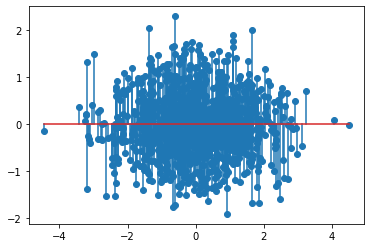

In [5]:
# T is the transformed version with two principal components
# We want to project the data onto the red line

plt.stem(T[:,0], T[:,1])

plt.show()

To do this we need to multiply the component weights with the data.

In this example it just means we project to the horizontal axis. Therefore we have converted 2D data to 1D data. This is dimension reduction!

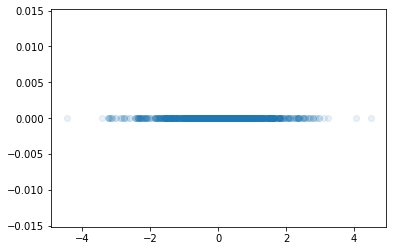

In [6]:
# Get the first component
w = pca.components_[:, 0]

# Reduce the dimension
# AKA project uto the principal components
pca = PCA(n_components=1)
pca.fit(X)
T_small = pca.transform(X)

# Alternatively do the following
# T_small = np.dot(X, pca.components_[:, 0])

plt.scatter(T_small, np.zeros(len(T_small)), alpha = 0.1)

plt.show()

## Interpretation of Loadings (Weights)

The values in the weights matrix describe a linear combination of the original variables.

For example the weights of the first principal component from the previous example are $[0.66559764, 0.74631078]$. This means that the reduced version $t = x_1 0.6655 + x_2 0.7463$.

In [15]:
pca.components_[:, 0]

array([0.70851256])

The magnitude of values in a principal component reflect how much the variable contributes to the component. The magnitude is relative not absolute. In this case, more information comes from the second variable $x_2$ because it is weighted higher!

#### Variables Lose Meaning 

Your transformed variables are combinations of existing variables. Therefore you should not make claims about the relationship of the original variables.

## Practical Considerations

### Mean centering

You should always mean centre the data. This means calculate the mean of each feature and subtract this from your data. Otherwise the first component will not describe the direction of maximum variance.

### Variables must share the same scale

You should standardize or normalize the variables so that they have unit variance.


## Selecting number of components

There are numerous methods to select a suitable number of components including:
- Scree plot (total variance)
- Elbow method
- Cross Validation
    
### Scree Plot

The Scree plot shows the proportion of total explained variance against the number of principal components. As the number of components approaches infinity the total explained varianced approaches 100%.

At some point we will be satisfied with the amount of variance. We might set this threshold at 95%, 90% or 85%. It depends on how much information you think you need to retain. We set the number of components to this corresponding proportion of explained variance.

In [4]:
import pandas as pd

br_df = pd.read_csv("BatonRouge.csv")

br_df.head()

,Price,SQFT,Bedrooms,Baths,Age,Occupancy,Pool,Style,Fireplace,Waterfront,DOM
0,66500,741,1,1,18,1,1,1,1,0,6
1,66000,741,1,1,18,2,1,1,0,0,23
2,68500,790,1,1,18,1,0,1,1,0,8
3,102000,2783,2,2,18,1,0,1,1,0,50
4,54000,1165,2,1,35,2,0,1,0,0,190


In [6]:
X = br_df[ br_df.columns.difference(['Price']) ]

# Standardisation. Very important!
# nomalization: essential for PCA!
X = (X - X.mean()) / X.std()

X.head()

,Age,Baths,Bedrooms,DOM,Fireplace,Occupancy,Pool,SQFT,Style,Waterfront
0,-0.091547,-1.589938,-3.072082,-0.717163,0.880680,-0.949928,3.398152,-1.572206,-0.752982,-0.278877
1,-0.091547,-1.589938,-3.072082,-0.538021,-1.134435,0.731912,3.398152,-1.572206,-0.752982,-0.278877
2,-0.091547,-1.589938,-3.072082,-0.696088,0.880680,-0.949928,-0.294005,-1.523600,-0.752982,-0.278877
3,-0.091547,0.043871,-1.662631,-0.253502,0.880680,-0.949928,-0.294005,0.453390,-0.752982,-0.278877
4,0.897156,-1.589938,-1.662631,1.221786,-1.134435,0.731912,-0.294005,-1.151612,-0.752982,-0.278877


In [9]:
# By default it will calculate all components
# Adjust n_components to save some time!
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# The explained variance of each variable in isolation
print(pca.explained_variance_ratio_)

[0.29741114 0.11971639 0.11072041 0.09905002 0.09352825 0.0831673
 0.07736634 0.0583377  0.03758198 0.02312049]


In [19]:
# The variance is relative to the previous component so we
# calculate the cumulative version
# It's a value between 0-1 so we multiply by 100 to get a percentage
import numpy as np
cum_var = np.cumsum(pca.explained_variance_ratio_) * 100

print(cum_var)

[ 29.74111364  41.71275256  52.78479314  62.68979495  72.04261974
  80.3593494   88.09598304  93.92975285  97.68795124 100.        ]


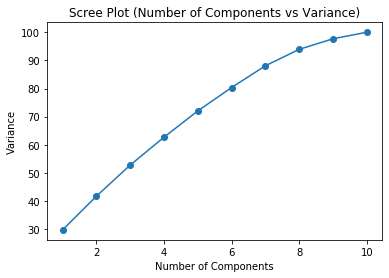

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.arange(1, 11), cum_var, marker = "o")

plt.xlabel("Number of Components")
plt.ylabel("Variance")

plt.title("Scree Plot (Number of Components vs Variance)")

plt.show()

In this case it seems that over 80% of the variance can be explained from the first 6 dimensions!

### Elbow Method

The Elbow method uses a Scree plot but does not define a fixed variance threshold. Instead it finds the "elbow" point in the scree plot. The elbow point is the point of maximum gradient. Beyond this point we don't expect much new information to be added. So we select this point as the required number of components.

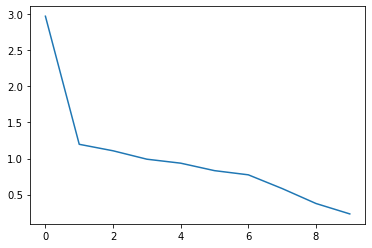

In [23]:
difference = np.diff(pca.explained_variance_ratio_)

plt.plot(pca.explained_variance_)

plt.show()

In [24]:
max_diff_idx = np.argmax(np.abs(difference))

max_diff_idx

0

In this case the elbow method selected the difference associated with index 0, which means we only need the first principal component! Obviously this is not a good choice as it only captures about 30% of the variance.

In cases with larger numbers of variables we might find a gap further along the number of variables.

## Principal Component Weights

In [25]:
import matplotlib.pyplot as plt
import numpy as np

first_component_weights = pd.DataFrame({'Weight': abs(pca.components_[0]), 'Feature': X.columns})

first_component_weights = first_component_weights.sort_values('Weight', ascending = False)

first_component_weights

,Weight,Feature
7,0.504450,SQFT
1,0.490359,Baths
2,0.429627,Bedrooms
4,0.333930,Fireplace
5,0.270345,Occupancy
0,0.197941,Age
9,0.196350,Waterfront
6,0.185678,Pool
8,0.129983,Style
3,0.082443,DOM


<div style="margin-bottom: 30px;"><img width=48 style="display: block; float: left;  margin-right: 20px;" src="img/question-mark-button.png"> <h3 style="padding-top: 15px;">Exercise 3 - PCA weight interpretation</h3></div>

In the table above, which features are the largest contributors to the first principal component? Plot a bar chart of weights associated with the top 10 contributing features.

In [1]:
# Task 2
import pandas as pd

In [2]:
# Load in our dataset
airline = pd.read_csv('airline_small.csv', encoding='ISO-8859-1')

/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Load in our dataset
airline = pd.read_csv('airline_small.csv', encoding='ISO-8859-1')

In [1]:
# Load in our dataset
airline = pd.read_csv('airline_small.csv', encoding='ISO-8859-1')# Inspect our data
airline.head()

NameError: name 'pd' is not defined

In [2]:
# Drop the not available data points (any data point that has at least one attribute that is missing)
# This is useless as we end up with no data point left (each data point has at least one attribute that is missing)
airline.dropna()

NameError: name 'airline' is not defined

In [3]:
# Pick out all the columns that are not useful
# We have to do this manually and this is purely based on our choice, not the algorithm
# We mainly pick these because they have a lot of missing data, or we do not think they are useful based on their meaning
bad_columns = ['TailNum', 'Cancelled', 'Diverted', 'TaxiIn', 'TaxiOut', 'CancellationCode', 'CarrierDelay',
               'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
# Subtract these columns away from the data
airline_sub = airline[airline.columns.difference(bad_columns)]
# airline.isnull().sum()

# Drop all the data points that still has missing values
airline_clean = airline_sub.dropna()
# airline_clean.isnull().sum()

# Remove the categorical variables
airline_clean = airline_clean.select_dtypes(['number'])

# Pick out the target variable
# > 20 -> 0
# <= 20 -> 1
target = (airline_clean['ArrDelay'] > 20).astype(int)

# Pick out our input features
features = airline_clean[airline_clean.columns.difference(['ArrDelay'])]

import numpy as np
from sklearn.model_selection import train_test_split

# We can now split this into training and testing sets
x_data = features
y_data = target
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

NameError: name 'airline' is not defined

In [4]:
x_train_mean = x_train.mean()
x_train_std = x_train.std()

# normalization before PCA
x_train_norm = (x_train - x_train_mean) / x_train_std

NameError: name 'x_train' is not defined

In [5]:
# We want to keep the transformation (standardization) the same across all data
# If you do not do this, then the normalized inputs will have different distributions and any regression / classification algorithm
# will not be able to pick this up directly
# DO NOT DO "x_test_norm = (x_test - x_test_mean) / x_test_std"
x_test_norm = (x_test - x_train_mean) / x_train_std

NameError: name 'x_test' is not defined

In [ ]:
from sklearn.decomposition import PCA

# Initialize a standard PCA object
pca = PCA()

# Fit PCA onto our data
pca.fit(x_train_norm)

In [6]:
# This is the porportion of data that is explained by each NEW dimension
explain_var = 100 * pca.explained_variance_ratio_
cum_var = np.cumsum(explain_var)

NameError: name 'pca' is not defined

In [7]:
import matplotlib.pyplot as plt

# Visualize the porportion variability explained by incorporting different number of dimensions
plt.plot(np.arange(x_train_norm.shape[1]) + 1, cum_var, marker='o')
plt.title('The proportion variability of the data explained by incorporting d dimensions')
plt.xlabel('Number of dimensions d to include')
plt.ylabel('Proportion variability explained (%)')
plt.show()

NameError: name 'np' is not defined

In [8]:
# We will choose to explain up to 85%
good_dimensions = (cum_var > 85).astype(int)
good_dimensions
# This is the number of components we need
n_components = np.argmax(good_dimensions)

NameError: name 'cum_var' is not defined

In [9]:
from sklearn.decomposition import PCA

# Initialize a standard PCA object
# n_components = 6
pca = PCA(n_components=n_components)

# Fit PCA onto our data
pca.fit(x_train_norm)

# I will transform both my training and testing input to the new dimensions
# PCA will make sure it uses the same transform for both training and testing data 
# (just like what we did before with standardization)

# PCA transfer, 
x_train_white = pca.transform(x_train_norm)
x_test_white = pca.transform(x_test_norm)


NameError: name 'n_components' is not defined

In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize the model without changing any of the default parameters
model_1 = LogisticRegression()

# Fit the model on our training data
model_1.fit(x_train_white, y_train)
y_pred = model_1.predict(x_test_white)

NameError: name 'x_train_white' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model without changing any of the default parameters
model_2 = LogisticRegression()

# Fit the model on our training data
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)


# pred vs pred_2
# using classification_report()